Before moving to the code, we will study about a brief overview of CNN: 

Convolutional Networks work by moving small filters across the input image. This means the filters are re-used for recognizing patterns throughout the entire input image. This makes the Convolutional Networks much more powerful than Fully-Connected networks with the same number of variables. This in turn makes the Convolutional Networks faster to train.

Convolutional neural networks (or ConvNets) are a very succesfull type of neural networks, and are an integral part of reigniting the interest in neural networks. They are abel to extract structural relations in the data such as spatial in images or temporal in time series.

Jason Yosinski and colleague developed a toolbox for visualizing convolutional networks. Unfortunately this toolbox is for Caffe, so we can't use it here, but they made a VERY instructive video that does a great job of conveying the intuitions.

In this lab you will learn what convolutional layers are and how they work, as well as important related concepts such as padding, stride, and pooling.

External resources:
For an indept tutorial please see stanford cs231n or to read more see Michael Nielsen.


for indepth tutorial please refer to https://cs231n.github.io/convolutional-networks/#overview


# What are convolutional networks?
ConvNets are in may respects very similar to the dense feedforward networks

* The network is still organized into layers
* Each layer is parameterized by weights and biases
* Each layer has an element-wise non-linear transformation (activation function)
* There are no cycles in the connections (more on this in later labs)

So what is the difference? The networks we saw previously are called dense because each unit receives input from all the units in the previous layer. This is not the case for ConvNets. In ConvNets each unit is only connected to a small subset of the input units. This is called the receptive field of the unit.

### Let us look at a quick example.
Let us define a 3x3 window with the kernel weights (indicated by red in the bottom right). We apply the window by performning elementwise multiplication, and then summing the results, as shown in this animation:

![../figures/convolutions.gif](/Users/mrinal18/Desktop/Research/Deep_Learning_Catalyst/figures/convolutions.gif)

After convoluting the images, we go element wise "non-linear" transformation on the convolved figures. In this example input is a 2D feature map with depth 1.


### Strides, padding, and pooling

Two important concepts for ConvNets are strides and padding.

### Padding
Padding describes what we do at the edges of the feature map. If we don't use padding the feature map will get smaller every time, as we can see above. If we do use padding we can maintain the same resolution. In deep learning we generally just pad with zeros. In the example below in the 'Padding, no strides' GIF we maintain the size by padding with one row/column of zeros on all sides.

Strides
describe how far the window is moved each time. Strides can be used to reduce the size of the feature map, and the number of computations that needs to be performed.

Strides and pooling (exerpted from [here](https://github.com/vdumoulin/conv_arithmetic#convolution-animations)) are shown in the table below. Notice how the output (green) changes shape.

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><img width="150px" src="figures/gif/no_padding_no_strides.gif"></td>
    <td><img width="150px" src="figures/gif/arbitrary_padding_no_strides.gif"></td>
    <td><img width="150px" src="figures/gif/same_padding_no_strides.gif"></td>
    <td><img width="150px" src="figures/gif/full_padding_no_strides.gif"></td>
  </tr>
  <tr>
    <td>No padding, no strides</td>
    <td>Arbitrary padding, no strides</td>
    <td>Half padding, no strides</td>
    <td>Full padding, no strides</td>
  </tr>
  <tr>
    <td><img width="150px" src="figures/gif/no_padding_strides.gif"></td>
    <td><img width="150px" src="figures/gif/padding_strides.gif"></td>
    <td><img width="150px" src="figures/gif/padding_strides_odd.gif"></td>
    <td></td>
  </tr>
  <tr>
    <td>No padding, strides</td>
    <td>Padding, strides</td>
    <td>Padding, strides (odd)</td>
    <td></td>
  </tr>
</table>


### Pooling
is another method for reducing the spatial resolution. Similar to convolutional layers it works by sliding a window accross the feature map. Unlike the convolutional layers there are no learnable parameters, and the pooling layers perform the same simple operation every time. The most common types of pooling are:

Max pooling where the output of the pooling operation is the highest value in the window, and
Mean pooling which outputs the mean of the elements in the window.

![pooling](/Users/mrinal18/Desktop/Research/Deep_Learning_Catalyst/figures/pooling.png)

In [1]:
! pip install -U torch torchvision catalyst albumentations

     |████████████████████████████████| 147.1 MB 1.6 MB/s            
     |████████████████████████████████| 1.2 MB 1.1 MB/s            
  Using cached catalyst-21.10-py2.py3-none-any.whl (576 kB)
     |████████████████████████████████| 102 kB 5.3 MB/s            
  Attempting uninstall: torch
    Found existing installation: torch 1.8.0
    Uninstalling torch-1.8.0:
      Successfully uninstalled torch-1.8.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.9.0
    Uninstalling torchvision-0.9.0:
      Successfully uninstalled torchvision-0.9.0
  Attempting uninstall: catalyst
    Found existing installation: catalyst 21.4.2
    Uninstalling catalyst-21.4.2:
      Successfully uninstalled catalyst-21.4.2
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.5.0
    Uninstalling albumentations-0.5.0:
      Successfully uninstalled albumentations-0.5.0
You should consider upgrading via the '/Users/mrinal18/opt/anaconda

Source taken from [here](https://colab.research.google.com/github/catalyst-team/dl-course/blob/master/week-03/seminar.ipynb)

In [2]:
from catalyst import dl, metrics, utils


utils.set_global_seed(42)
device = utils.get_device()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.models as models
%matplotlib inline

In [4]:
!wget http://placekitten.com/200/300 -O cat.jpg 

--2021-11-24 00:08:21--  http://placekitten.com/200/300
Resolving placekitten.com (placekitten.com)... 2606:4700:3035::ac43:b450, 2606:4700:3030::6815:3042, 104.21.48.66, ...
Connecting to placekitten.com (placekitten.com)|2606:4700:3035::ac43:b450|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7987 (7.8K)
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>]   7.80K  --.-KB/s    in 0s      

2021-11-24 00:08:21 (30.0 MB/s) - ‘cat.jpg’ saved [7987/7987]



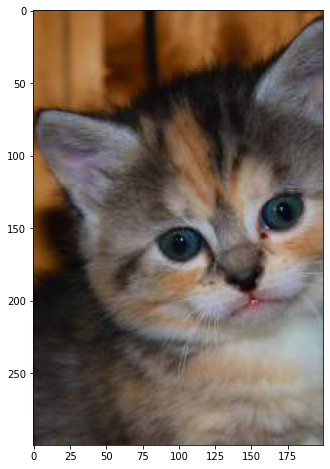

In [5]:
from PIL import Image

image = Image.open("cat.jpg")
fig, ax = plt.subplots(figsize=(18, 8))
ax.imshow(image)

Before we move to a bigger model, let's try to code a small CNN model for our understanding

In [19]:

class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
    

We saw here how to implement a very basic model for Convolution networks but we will make use of a larger model in this section for better visualising of the results

We will use ResNet and AlexNet demonstration. 

It has big kernels in the begging, and they compute easy-to-understand feature pics.


![../figures/convolutions.gif](/Users/mrinal18/Desktop/Research/Deep_Learning_Catalyst/figures/alexnet6.jpeg)


This above is a AlexNet model. As we can see it is huge and makes a better representation of the data: http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf

* Layer 1 is a Convolution Layer,
* Input Image size is – 224 x 224 x 3
* Number of filters – 96
* Filter size – 11 x 11 x 3
* Stride – 4
* Layer 1 Output
* 224/4 x 224/4 x 96 = 55 x 55 x 96 (because of stride 4)
* Split across 2 GPUs – So 55 x 55 x 48 for each GPU


In [20]:
model_res_net = models.resnet18(pretrained=True)
print(
    "\n".join(
        f"Name: {n}, module:{m}"
        for n, m in list(model_res_net.named_children())
    )
)

model_alexnet = models.alexnet(pretrained=True)
print(
    "\n".join(
        f"Name: {n}, module:{m}"
        for n, m in list(model_alexnet.features.named_modules())[1:]
    )
)

Name: conv1, module:Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Name: bn1, module:BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
Name: relu, module:ReLU(inplace=True)
Name: maxpool, module:MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
Name: layer1, module:Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(i

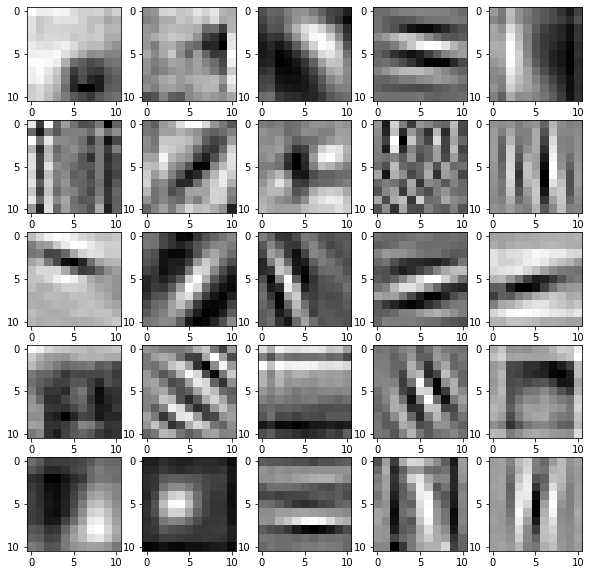

In [7]:
_, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(25):
    w = model_alexnet.features[0].weight[i].detach().numpy()[0]
    w = (w - w.min()) / (w.max() - w.min())
    ax[i // 5, i % 5].imshow(w, cmap="gray")

In [8]:
from scipy import signal


def convolute(w):
    """
    Quick written function for showing convolution results
    """
    new_image = signal.convolve2d(np.array(image)[:,:,0], w)
    _, ax = plt.subplots(1, 3, figsize=(10, 5))
    ax[0].imshow(np.array(image), cmap='gray')
    ax[2].imshow(new_image, cmap='gray')
    ax[1].imshow(w, cmap='gray')

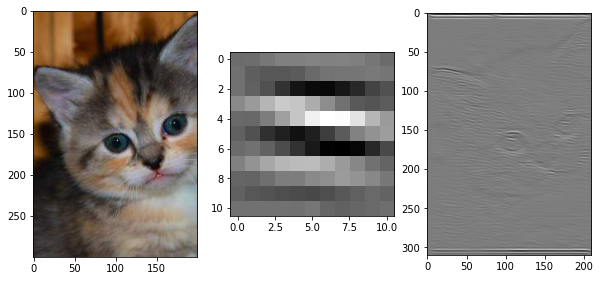

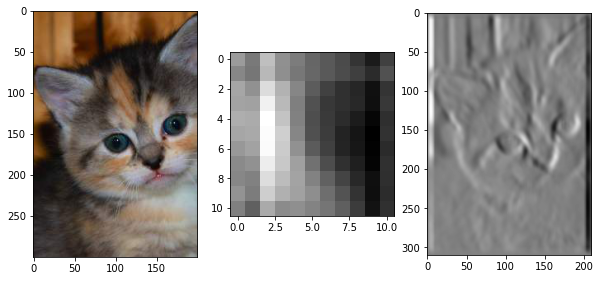

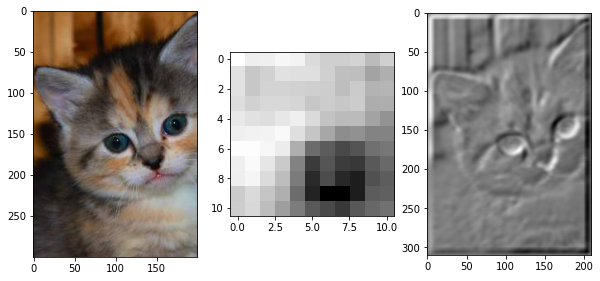

In [9]:
convolute(model_alexnet.features[0].weight[3].detach().numpy()[0])
convolute(model_alexnet.features[0].weight[4].detach().numpy()[0])
convolute(model_alexnet.features[0].weight[0].detach().numpy()[0])

In [10]:
import os
from torch import nn, optim
from torch.utils.data import DataLoader
from catalyst import dl
from catalyst.data import ToTensor
from catalyst.contrib.datasets import MNIST

model = nn.Sequential(nn.Flatten(), nn.Linear(28 * 28, 10))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.02)

train_data = MNIST(os.getcwd(), train=True, download=True, transform=ToTensor())
valid_data = MNIST(os.getcwd(), train=False, download=True, transform=ToTensor())


Extracting /Users/mrinal18/Desktop/Research/Deep_Learning_Catalyst/MNIST/raw/train-images-idx3-ubyte.gz to /Users/mrinal18/Desktop/Research/Deep_Learning_Catalyst/MNIST/raw



Extracting /Users/mrinal18/Desktop/Research/Deep_Learning_Catalyst/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/mrinal18/Desktop/Research/Deep_Learning_Catalyst/MNIST/raw



Extracting /Users/mrinal18/Desktop/Research/Deep_Learning_Catalyst/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/mrinal18/Desktop/Research/Deep_Learning_Catalyst/MNIST/raw



Extracting /Users/mrinal18/Desktop/Research/Deep_Learning_Catalyst/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/mrinal18/Desktop/Research/Deep_Learning_Catalyst/MNIST/raw
Processing...
Done!


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/catalyst/contrib/datasets/functional.py:187: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


We will first look at an extensive implementation and then go to an easy way

In [11]:
import os


import numpy as np
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
import torchvision.models as models
import torchvision.transforms as transforms

from catalyst import dl, metrics, utils
from catalyst.data.transforms import ToTensor
from catalyst.contrib.datasets import MNIST

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


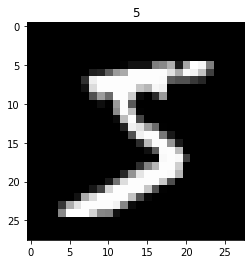

In [12]:
print(train_data.classes)
plt.imshow(train_data[0][0].numpy().reshape(28, 28), cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

In [13]:
loaders = {
    "train": DataLoader(train_data, batch_size=32),
    "valid": DataLoader(valid_data, batch_size=32),
}

Let's do this using a very convinient way!!

In [14]:

runner = dl.SupervisedRunner() #Runner for experiments with supervised model
# model training
runner.train( #train model, returns trained model
    model=model, #model to train
    criterion=criterion, #loss function
    optimizer=optimizer, #optimizer for model
    loaders=loaders, #loaders for train and validation
    num_epochs=1, #number of epochs
    logdir="./logs", #logs will be saved in ./logs
    valid_loader="valid",
    valid_metric="loss",
    minimize_valid_metric=True, #minimize loss
    verbose=True,
# uncomment for extra metrics:
    callbacks=[
        dl.AccuracyCallback(input_key="logits", target_key="targets", num_classes=10),
        dl.PrecisionRecallF1SupportCallback(
            input_key="logits", target_key="targets", num_classes=10
        ),
        dl.AUCCallback(input_key="logits", target_key="targets"),
        # catalyst[ml] required ``pip install catalyst[ml]``
        dl.ConfusionMatrixCallback(
            input_key="logits", target_key="targets", num_classes=10
        ),
    ]
)



train (1/1) accuracy: 0.8802000284194946 | accuracy/std: 0.07211192690648818 | accuracy01: 0.8802000284194946 | accuracy01/std: 0.07211192690648818 | accuracy03: 0.9749833345413208 | accuracy03/std: 0.035556878759006386 | accuracy05: 0.9922166466712952 | accuracy05/std: 0.021172655956324664 | auc: 0.9688512086868286 | auc/_macro: 0.9688512086868286 | auc/_micro: 0.973903933919753 | auc/_weighted: 0.9695191383361816 | auc/class_00: 0.9922134280204773 | auc/class_01: 0.9954110383987427 | auc/class_02: 0.9625781178474426 | auc/class_03: 0.9616897702217102 | auc/class_04: 0.9823517799377441 | auc/class_05: 0.9441468119621277 | auc/class_06: 0.9888443350791931 | auc/class_07: 0.9870496392250061 | auc/class_08: 0.925434410572052 | auc/class_09: 0.9487923383712769 | f1/_macro: 0.8785686190050113 | f1/_micro: 0.8801950000284025 | f1/_weighted: 0.8800828914930032 | f1/class_00: 0.9400252370089421 | f1/class_01: 0.9478748589545813 | f1/class_02: 0.8672831361052344 | f1/class_03: 0.8553871569081


valid (1/1) accuracy: 0.8500999808311462 | accuracy/std: 0.08383058962440657 | accuracy01: 0.8500999808311462 | accuracy01/std: 0.08383058962440657 | accuracy03: 0.958299994468689 | accuracy03/std: 0.042961256580280514 | accuracy05: 0.9883000254631042 | accuracy05/std: 0.020249098809583074 | auc: 0.969036877155304 | auc/_macro: 0.969036877155304 | auc/_micro: 0.9684239455555557 | auc/_weighted: 0.9696526527404785 | auc/class_00: 0.9975904822349548 | auc/class_01: 0.9951446652412415 | auc/class_02: 0.9740807414054871 | auc/class_03: 0.9561748504638672 | auc/class_04: 0.9890892505645752 | auc/class_05: 0.9494045972824097 | auc/class_06: 0.9942003488540649 | auc/class_07: 0.9838905334472656 | auc/class_08: 0.8879345059394836 | auc/class_09: 0.9628586769104004 | f1/_macro: 0.839365891851809 | f1/_micro: 0.8500950000294081 | f1/_weighted: 0.8420599558024573 | f1/class_00: 0.9621907546492889 | f1/class_01: 0.9132148207453283 | f1/class_02: 0.8702240088277355 | f1/class_03: 0.823586384205588

In the above code, we say about metrics, we will learn about them in another notebook because this is used to evaluating and inferring the model.

## Convolutional Neural Networks for Image Classification

In the previous lesson you saw how to use a CNN to make your recognition of the handwriting digits more efficient. In this lesson you'll take that to the next level, recognizing real images of Cats and Dogs in order to classify an incoming image as one or the other. In particular the handwriting recognition made your life a little easier by having all the images be the same size and shape, and they were all monochrome color. Real-world images aren't like that -- they're in different shapes, aspect ratios etc, and they're usually in color!

So, as part of the task you need to process your data -- not least resizing it to be uniform in shape. 

You'll follow these steps:

1.   Explore the Example Data of Cats and Dogs
2.   Build and Train a Neural Network to recognize the difference between the two
3.   Evaluate the Training and Validation accuracy

In [15]:
"""
1. Implement a classification of cats and dogs using catalyst without any arguments.
2. extract dataset from https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from catalyst.dl import SupervisedRunner

# 1. prepare data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = datasets.ImageFolder('../data/cat_dog/train', transform=transform)
valid_data = datasets.ImageFolder('../data/cat_dog/valid', transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False, num_workers=4)

loaders = {"train": train_loader, "valid": valid_loader}

# 2. prepare model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

# 3. prepare optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 4. prepare callbacks
callbacks = [dl.AccuracyCallback(num_classes=2, accuracy_args=[1])]

# 5. train model
runner = SupervisedRunner()
runner.train(
    model=model,
    optimizer=optimizer,
    loaders=loaders,
    callbacks=callbacks,
    logdir="./logs",
    num_epochs=10,
    verbose=True
)

FileNotFoundError: [Errno 2] No such file or directory: '../data/cat_dog/train'

### CIFAR & ResNet

Next we are going to create a model with ResNet architecture [arxiv](https://arxiv.org/abs/1512.03385). This architecture has important techniques, which are used in a lot of models (Residual connections) and resnet models are easy to impolement and train.

We have to do some changes in the model. The first convolutional layer has smaller kernel size (3 vs 7) and stride (1 vs 3). A MaxPool layer is deleted from our implementation.

In [21]:
import os
from pathlib import Path
from datetime import datetime

import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import CIFAR10
import torchvision.models as models
import torchvision.transforms as transforms

from catalyst import dl, metrics, utils
from catalyst.data.transforms import ToTensor
from catalyst.contrib.datasets import MNIST

In [22]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride, p=0.1):
        super().__init__()

        self.input = nn.Sequential(
            nn.Conv2d(
                in_channels=in_channels,
                out_channels=out_channels,
                kernel_size=3,
                stride=stride,
                padding=1,
                bias=False,
            ),
            nn.BatchNorm2d(out_channels),
            nn.Dropout(p),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=out_channels,
                out_channels=out_channels,
                kernel_size=3,
                stride=1,
                padding=1,
                bias=False,
            ),
        )
        self.res = nn.Conv2d(
            in_channels=in_channels,
            out_channels=out_channels,
            stride=stride,
            kernel_size=1,
            bias=False,
        )
        self.output = nn.Sequential(
            nn.BatchNorm2d(out_channels), nn.Dropout(p), nn.ReLU()
        )

    def forward(self, x):
        inp = self.input(x)
        res = self.res(x)
        return self.output(inp + res)


class ResNet18(nn.Module):
    def __init__(self, channels=3, in_features=64, num_classes=10, p=0.1):
        super().__init__()

        self.input = nn.Sequential(
            nn.Conv2d(
                in_channels=channels,
                out_channels=in_features,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.BatchNorm2d(in_features),
            nn.Dropout(p),
        )

        self.layer_0 = self._make_layer(in_features, 1)
        self.layer_1 = self._make_layer(in_features)
        in_features *= 2
        self.layer_2 = self._make_layer(in_features)
        in_features *= 2
        self.layer_3 = self._make_layer(in_features)

        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(512, num_classes),
        )

    def _make_layer(self, in_features, multiplier=2, p=0.1):
        return nn.Sequential(
            ResNetBlock(in_features, in_features * multiplier, stride=2, p=p),
            ResNetBlock(
                in_features * multiplier,
                in_features * multiplier,
                stride=1,
                p=p,
            ),
        )

    def forward(self, x):
        x = self.input(x)
        x = self.layer_0(x)
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.layer_3(x)
        return self.fc(x)

Let's take a look at the CIFAR-10 dataset.


Extracting /Users/mrinal18/Desktop/Research/Deep_Learning_Catalyst/cifar-10-python.tar.gz to /Users/mrinal18/Desktop/Research/Deep_Learning_Catalyst


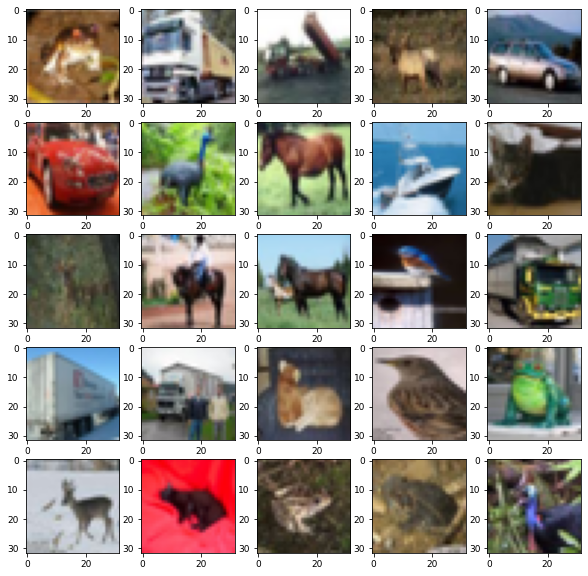

In [23]:
import matplotlib.pyplot as plt
import os


cifar_dataset = CIFAR10(os.getcwd(), train=True, download=True)

_, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(25):
    ax[i // 5, i % 5].imshow(cifar_dataset[i][0], cmap="gray")

These are the original images, but for our model to work we need to resize them to be 224 x 224 x 3.
Therefore, always normalize the images to be in the range [0, 1] and then scale them to be in the range [0, 255]

In [25]:
cifar_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)


loaders = {
    "train": DataLoader(
        CIFAR10(os.getcwd(), train=True, download=True, transform=cifar_transforms),
        batch_size=64,
        shuffle=True,
    ),
    "valid": DataLoader(
        CIFAR10(os.getcwd(), train=False, download=True, transform=cifar_transforms),
        batch_size=64,
        shuffle=True,
    ),
}

Files already downloaded and verified
Files already downloaded and verified


Now, we can define a custom runner for this dataset.

In [42]:
class CIFARRunner(dl.Runner): #dl.Runner is a base class for all runners in catalyst and it is used to run the training and validation loops. It also provides a few utility functions for training and validation.
#Also, it is a good practice to inherit from dl.Runner and implement the run_train_epoch and run_valid_epoch functions.

    def predict_batch(self, batch): #predict_batch is a function that takes a batch of data and returns the predictions for that batch.
        return self.model(batch[0]).to(self.device)
    def handle_batch(self, batch): #handle_batch is a function that takes a batch of data and returns the loss for that batch.
        x, y = batch
        y_pred = self.model(x)
        
        self.batch = {"features": x, "logits": y_pred, "targets": y}        

Now, we can train the dataset now using our custom runner and ResNet model

In [43]:
from catalyst.contrib.nn import Lookahead

model = ResNet18()
optimizer = Lookahead(torch.optim.Adam(model.parameters(), lr=1e-3))
criterion = nn.CrossEntropyLoss()

runner = CIFARRunner()
# model training
runner.train(
    engine=dl.DeviceEngine(device=device),
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    loaders=loaders,
    logdir=Path("logs") / datetime.now().strftime("%Y%m%d-%H%M%S"),
    num_epochs=1,
    verbose=True,
    load_best_on_end=True,
    callbacks={
        "criterion": dl.CriterionCallback(
            input_key="logits", target_key="targets", metric_key="loss",
        ),
        "accuracy": dl.AccuracyCallback(
            input_key="logits", target_key="targets", num_classes=10
        ),
        "optimizer": dl.OptimizerCallback(
            metric_key="loss", accumulation_steps=1, 
            grad_clip_fn=None, grad_clip_params=None,
        ),
    },
)

Keyboard Interrupt


KeyboardInterrupt: 